# SVM single class to detect anomalies 
Detect anomaly in a dataset by using the One-class SVM method in Python.

In [1]:
from src.image_OCT import *
from sklearn.model_selection import cross_val_score
from src.image_Quantification_3 import *
import math 
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.svm import OneClassSVM
import warnings
warnings.filterwarnings("ignore")

dirname = os.getcwd()
print(dirname)
savefold=os.path.join(dirname, 'Data\Figure\\') # "C:/Users/csoub/OneDrive/Bureau/3A/Ensta/Super projet/Algo_Maelle/Data/Figure/"
extension=".png"
%matplotlib inline


c:\Users\csoub\OneDrive\Bureau\3A\Ensta\Super projet\Quantification_of_corneal_surgery_antecedent


In [2]:
filepathname_haze1=os.path.join(dirname, 'Data','HAZE','haze 1.jpg')
filepathname_haze2=os.path.join(dirname, 'Data','HAZE','haze 3.jpg')
filepathname_healthy1=os.path.join(dirname, 'Data','Healthy','23923_BOULIS_OD.jpg')
filepathname_healthy2=os.path.join(dirname, 'Data','VILBERT_Maelle','test.jpg')
filepathname_fuchs1=os.path.join(dirname, 'Data','Fuchs_2','VANLUD_OD_6_Line.jpg')
# filepathname_fuchs2=os.path.join(dirname, 'Data','Fuchs_2','FAIJEA_OS_1_Line.jpg')
filepathname_fuchs2=os.path.join(dirname, 'Data','Fuchs_2','SELNIC_OS_0_Line.jpg')

# filepathname=os.path.join(dirname, 'Data','Healthy','80608_REZAZK_OS.jpg')
test_ex=[filepathname_haze1,filepathname_haze2,filepathname_healthy1,filepathname_healthy2,filepathname_fuchs1,filepathname_fuchs2]
test_type=["haze1","haze2","healthy1","healthy2","fuchs1",'fuchs2']

In [3]:
# Compute or import dataset
move=True
useExpCorr=False
# folder="exp_correction/"
# append="_mov_win-exp_corr_"
append="_mov_win_"
folder=""
eliminate=0

try:
	data_healthy = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy"+append+".pkl")
except:
	repertory_healthy=os.path.join(dirname, 'Data','Healthy')
	healthy_value=1 #healthy
	data_healthy=create_new_dataset(repertory_healthy,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy.to_pickle("./Dataset/data_set_Q3_healthy"+append+".pkl")
 
try:
	data_healthy_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_healthy_2"+append+".pkl")
except:
	repertory_healthy_2=os.path.join(dirname, 'Data','Healthy_2')
	healthy_value=1 #healthy
	data_healthy_2=create_new_dataset(repertory_healthy_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_healthy_2.to_pickle("./Dataset/data_set_Q3_healthy_2"+append+".pkl")
try:
	data_haze = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze"+append+".pkl")
except:
	repertory_haze=os.path.join(dirname, 'Data','HAZE')
	healthy_value=0 #patho
	data_haze=create_new_dataset(repertory_haze,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_haze.to_pickle("./Dataset/data_set_Q3_haze"+append+".pkl")

try:
	data_haze_2 = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_haze_2"+append+".pkl")
except:
	repertory_haze_2=os.path.join(dirname, 'Data','HAZE_2')
	healthy_value=0 #patho
	data_haze_2=create_new_dataset(repertory_haze_2,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_haze_2.to_pickle("./Dataset/data_set_Q3_haze_2"+append+".pkl")

try:
	data_fuchs = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs"+append+".pkl")
except:
	repertory_fuchs=os.path.join(dirname, 'Data','Fuchs_2')
	healthy_value=2 #fushs
	data_fuchs=create_new_dataset(repertory_fuchs,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_fuchs.to_pickle("./Dataset/data_set_Q3_fuchs"+append+".pkl")

try:
	data_fuchs_rep = pd.read_pickle("./Dataset/"+folder+"data_set_Q3_fuchs_rep"+append+".pkl") 
except:
	repertory_fuchs_rep=os.path.join(dirname, 'Data','repetabilite_FuchsDMEK')
	healthy_value=2 #fushs
	data_fuchs_rep=create_new_dataset(repertory_fuchs_rep,healthy_value,movingWin=move,eliminate=eliminate,useExpCorr=useExpCorr)
	data_fuchs_rep.to_pickle("./Dataset/data_set_Q3_fuchs_rep"+append+".pkl")

print("Succesfully imported")

Succesfully imported


In [4]:
# selection = ['Sigma', 'Mean', 'Beta','IntensityPeak'] #, 'MSE','AreaRatio', #'PeakWidth', 'Sigma', 'DataCov', 'Mean', 'MSE', 'AreaRatio', 'Alpha','Beta', 'IntensityPeak', 'Healthy', 'Origin'
# selection = ['Sigma', 'Mean', 'Beta','IntensityPeak','MSE','AreaRatio']
selection = ['PeakWidth', 'Sigma', 'DataCov', 'Mean', 'MSE', 'AreaRatio', 'Alpha','Beta', 'IntensityPeak']
# selct=False
# if selct:
nb_param=len(selection)
data_healthy_2=data_healthy_2.filter(selection+list(data_fuchs.columns[9:]),axis=1)
data_haze_2=data_haze_2.filter(selection+list(data_fuchs.columns[9:]),axis=1)
data_fuchs=data_fuchs.filter(selection+list(data_fuchs.columns[9:]),axis=1)
# selection=['Sigma', 'Mean', 'MSE','AreaRatio', 'Beta','IntensityPeak']
# else:
#     nb_param=

In [5]:
# Create learning DataSet
data=pd.concat([data_healthy_2],ignore_index=True)
# data=pd.concat([data_healthy_2,data_fuchs])
# data=data_healthy
# data=pd.concat([data_healthy,data_haze])
# data
data_copy=data.drop(["Healthy","Origin"],axis=1)
# data_copy=pd.DataFrame(np.real(data_copy))
# data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_data, test_size=0.2)

ytrain=train["Healthy"]
Xtrain=train.drop(["Healthy"],axis=1)

ytest=test["Healthy"]
Xtest=test.drop(["Healthy"],axis=1)

print("Total number of data:{:.0f} splited in train:{:.0f} and test:{:.0f}".format(len(data),len(ytrain),len(ytest)))
print("		Number of healthy in   dataset:{:.0f} ({:.0f}%) train:{:.0f} ({:.0f}%) test:{:.0f} ({:.0f}%)".format(np.sum(data["Healthy"]==1),(np.sum(data["Healthy"]==1)/len(data["Healthy"]==1)*100),np.sum(ytrain==1),(np.sum(ytrain==1)/len(ytrain)*100),np.sum(ytest==1),(np.sum(ytest==1)/len(ytest)*100)))
print("		Number of haze    in   dataset:{:.0f} ({:.0f}%) train:{:.0f} ({:.0f}%) test:{:.0f} ({:.0f}%)".format(np.sum(data["Healthy"]==0),(np.sum(data["Healthy"]==0)/len(data["Healthy"]==0)*100),np.sum(ytrain==0),(np.sum(ytrain==0)/len(ytrain)*100),np.sum(ytest==0),(np.sum(ytest==0)/len(ytest)*100)))
print("		Number of fuchs   in   dataset:{:.0f} ({:.0f}%) train:{:.0f} ({:.0f}%) test:{:.0f} ({:.0f}%)".format(np.sum(data["Healthy"]==2),(np.sum(data["Healthy"]==2)/len(data["Healthy"]==2)*100),np.sum(ytrain==2),(np.sum(ytrain==2)/len(ytrain)*100),np.sum(ytest==2),(np.sum(ytest==2)/len(ytest)*100)))
# ytrain=(ytrain==1)*1
# ytest=(ytest==1)*1
# ytest["Healthy"]=(ytest["Healthy"]==1)*1
# new_data["Healthy"]=data["Healthy"]

Total number of data:166 splited in train:132 and test:34
		Number of healthy in   dataset:166 (100%) train:132 (100%) test:34 (100%)
		Number of haze    in   dataset:0 (0%) train:0 (0%) test:0 (0%)
		Number of fuchs   in   dataset:0 (0%) train:0 (0%) test:0 (0%)


## Training model

Text(0.5, 1.0, 'kernel')

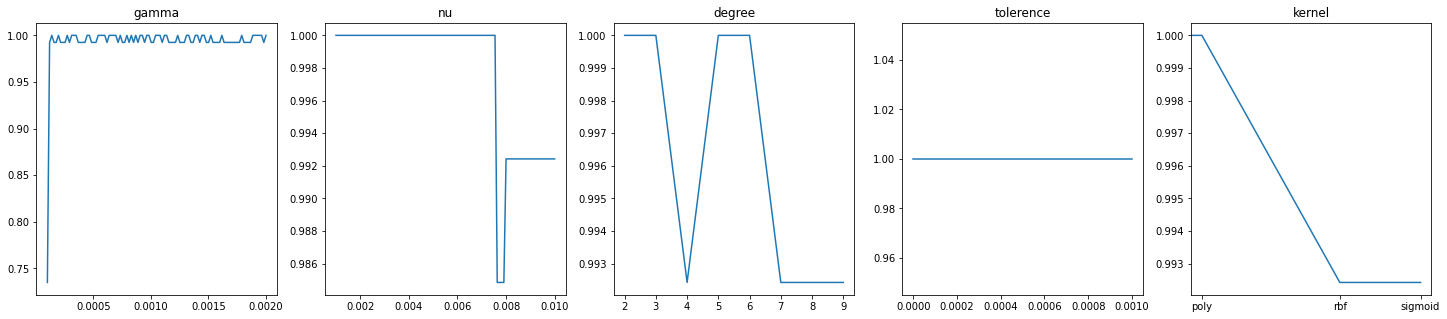

In [6]:
def train_svm_oneclass(Xtrain,gamma=0.0005,nu=0.005,degree=6,tol=10**(-3),kernel='poly'):
	clf = OneClassSVM(kernel=kernel,degree=degree, tol=tol,gamma=gamma, nu=nu,verbose=False)
	clf.fit(Xtrain)
	pred = clf.predict(Xtrain)
	score = np.sum(pred==1)/len(pred)
	return(score)

fig,ax=plt.subplots(1,5,figsize=(25,5))

gamma_v=np.linspace(0.0001,0.002,100)	
nu_v=np.linspace(0.001,0.01,100)	
degree_v=np.arange(2,10,1)	
tol_v=[10**(-3),10**(-4),10**(-5),10**(-6),10**(-7),10**(-8),10**(-9)]

score=[]
for gamma in gamma_v:
    score.append(train_svm_oneclass(Xtrain,gamma=gamma))
ax[0].plot(gamma_v,score)
ax[0].set_title("gamma")

score=[]
for nu in nu_v:
    score.append(train_svm_oneclass(Xtrain,nu=nu))
ax[1].plot(nu_v,score)
ax[1].set_title("nu")

score=[]
for degree in degree_v:
    score.append(train_svm_oneclass(Xtrain,degree=degree))
ax[2].plot(degree_v,score)
ax[2].set_title("degree")

score=[]
for tol in tol_v:
    score.append(train_svm_oneclass(Xtrain,tol=tol))
plt.xscale("log")
ax[3].plot(tol_v,score)
ax[3].set_title("tolerence")

kernel_v=['linear', 'poly', 'rbf', 'sigmoid']
score=[]
for ker in kernel_v:
    score.append(train_svm_oneclass(Xtrain,kernel=ker))
ax[4].set_xscale("log")
ax[4].plot(kernel_v,score)
ax[4].set_title("kernel")

In [17]:
clf = OneClassSVM(kernel='poly',degree=5, tol=10**(-3),gamma=0.0005, nu=0.005,verbose=False)
clf.fit(Xtrain)
pred = clf.predict(Xtrain)
score = np.sum(pred==1)/len(pred)
print(score)

1.0


Text(0, 0.5, 'arbitrary Y axis (23%)')

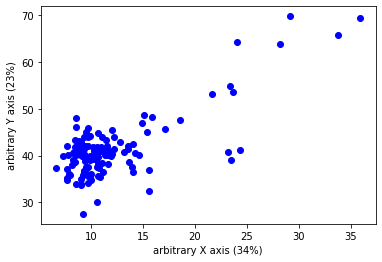

In [18]:
from sklearn.decomposition import PCA
data_copy=data.drop(["Healthy","Origin"],axis=1)
data_copy=(data_copy-np.mean(data_copy,0))/np.std(data_copy,0)
N=len(data_copy)
K=len(data_copy.columns)
pca = PCA()
pca.fit(data_copy)

def get_pca_XY(Xmatrix,data_copy,pca):
    Xmatrix=(Xmatrix-np.mean(data_copy,0))/np.std(data_copy,0)
    X=np.sum(Xmatrix*pca.components_[0],axis=1)
    Y=np.sum(Xmatrix*pca.components_[1],axis=1)
    return(X,Y)

plt.figure()
X_detected=Xtrain.iloc[ pred==1,:]
X,Y = get_pca_XY(X_detected,data_copy,pca)
plt.scatter(X,Y,color='blue')
X_notdetected=Xtrain.iloc[ pred!=1,:]
X,Y = get_pca_XY(X_notdetected,data_copy,pca)
plt.scatter(X,Y,color='red')
plt.xlabel("arbitrary X axis ({:.0f}%)".format(pca.explained_variance_ratio_[0]*100))
plt.ylabel("arbitrary Y axis ({:.0f}%)".format(pca.explained_variance_ratio_[1]*100))

## Validation: 

In [19]:
pred = clf.predict(Xtest)
score = np.sum(pred==1)/len(pred)
print(score)

0.9705882352941176


## Cross Validation

In [20]:
scores = cross_val_score(estimator=clf, X=Xtrain, y=np.ones(Xtrain.shape[0]), cv=10, scoring='accuracy')
print("Averaged accuracy: {:.1f}%".format(100*np.mean(scores)))
print(scores)

Averaged accuracy: 99.3%
[1.         0.92857143 1.         1.         1.         1.
 1.         1.         1.         1.        ]


## What about injecting fuchs or haze ?

In [21]:
data=data_fuchs
data_copy=data.drop(data.columns[nb_param:],axis=1)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]

y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)

y_pred = clf.predict(X)
print("Accuracy: {:.2f}%".format(np.sum(y_pred == -1)/len(y_pred)*100))

# proba = clf.predict_proba(X)

Accuracy: 0.63%


In [22]:
data=data_haze_2
data_copy=data.drop(data.columns[nb_param:],axis=1)

new_data=data_copy
new_data["Healthy"]=data["Healthy"]

y=new_data["Healthy"]
X=new_data.drop(["Healthy"],axis=1)

y_pred = clf.predict(X)
print("Accuracy: {:.2f}%".format(np.sum(y_pred == -1)/len(y_pred)*100))

Accuracy: 0.00%
